In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from wordcloud import WordCloud,STOPWORDS

In [4]:
import nltk
nltk.download('inaugural')

[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\RAVINTHIRAN\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\inaugural.zip.


True

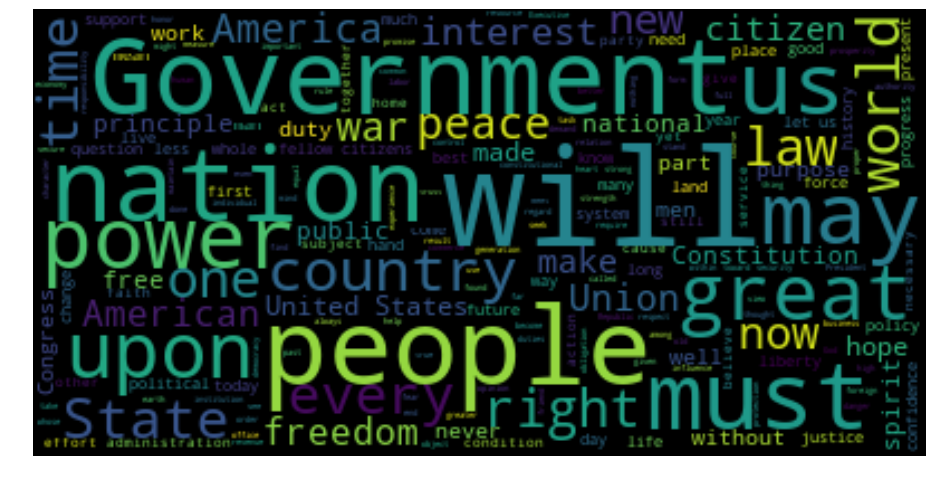

In [5]:
from nltk.corpus import inaugural
data = pd.read_csv('F:/Applied Informatics/Semester III/Data Visualization/Homeworks/Task8/archive.csv')
text = inaugural.raw()
wordcloud = WordCloud(max_font_size=60).generate(text)
plt.figure(figsize=(16,12))

plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [8]:
nltk.download('genesis')

[nltk_data] Downloading package genesis to
[nltk_data]     C:\Users\RAVINTHIRAN\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\genesis.zip.


True

In [10]:
nltk.download('nps_chat')

[nltk_data] Downloading package nps_chat to
[nltk_data]     C:\Users\RAVINTHIRAN\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\nps_chat.zip.


True

In [12]:
nltk.download('webtext')

[nltk_data] Downloading package webtext to
[nltk_data]     C:\Users\RAVINTHIRAN\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\webtext.zip.


True

[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\RAVINTHIRAN\AppData\Roaming\nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package treebank to
[nltk_data]     C:\Users\RAVINTHIRAN\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\treebank.zip.


*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


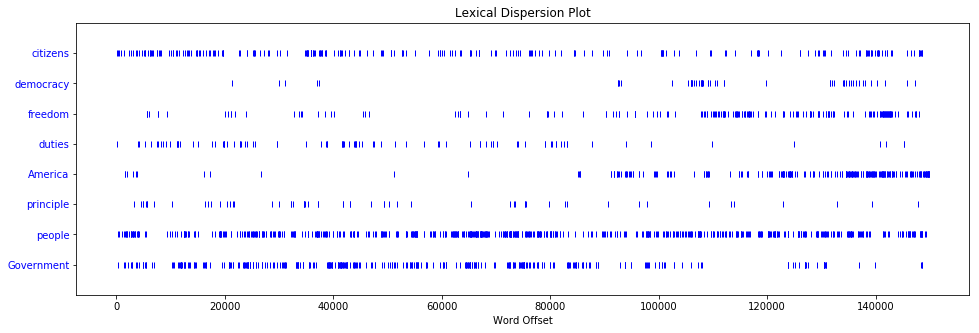

In [14]:
nltk.download('gutenberg')
nltk.download('treebank')
from  nltk.book import text4 as inaugural_speeches
plt.figure(figsize=(16,5))
topics = ['citizens', 'democracy', 'freedom', 'duties', 'America','principle','people', 'Government']
inaugural_speeches.dispersion_plot(topics)

In [16]:
nltk.download('brown')
from nltk.corpus import brown
stop_words = set(STOPWORDS)
topics = ['government', 'news', 'religion','adventure','hobbies']
for topic in topics:
    # filter out stopwords and punctuation mark and only create array of words
    words = [word for word in brown.words(categories=topic)
            if word.lower() not in stop_words and word.isalpha() ]
    freqdist = nltk.FreqDist(words)
    # print 5 most frequent words
    print(topic,'more :', ' , '.join([ word.lower() for word, count in freqdist.most_common(5)]))
    # print 5 least frequent words
    print(topic,'less :', ' , '.join([ word.lower() for word, count in freqdist.most_common()[-5:]]))

[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\RAVINTHIRAN\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\brown.zip.


government more : will , year , states , united , may
government less : load , cadre , perception , lengthened , shadow
news more : said , will , one , last , two
news less : pupils , render , vitally , richer , fuller
religion more : god , world , one , may , new
religion less : medium , sat , ivory , velvet , sadness
adventure more : said , back , man , one , time
adventure less : snick , fisted , overhand , plunge , insanely
hobbies more : will , one , may , time , two
hobbies less : explore , hinterlands , bride , winner , sweepstakes


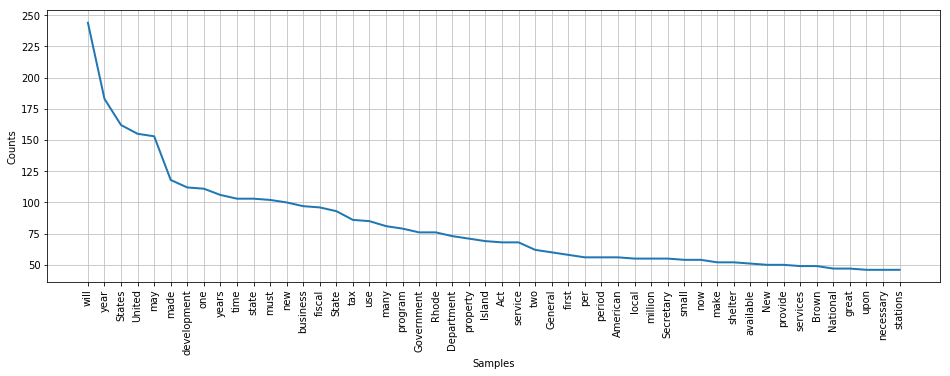

In [17]:
corpus_genre = 'government'
words = [word for word in brown.words(categories=corpus_genre) if word.lower() not in stop_words and word.isalpha() ]
freqdist = nltk.FreqDist(words)
plt.figure(figsize=(16,5))
freqdist.plot(50)

In [18]:
def lexical_diversity(text):
    return round(len(set(text)) / len(text),2) 

def get_brown_corpus_words(category, include_stop_words=False):
    '''helper method to get word array for a particular category
     of brown corpus which may/may not include the stopwords that can be toggled
     with the include_stop_words flag in the function parameter'''
    if include_stop_words:
        words = [word.lower() for word in brown.words(categories=category) if word.isalpha() ]
    else:
        words = [word.lower() for word in brown.words(categories=category)
                 if word.lower() not in stop_words and word.isalpha() ]
    return words


for genre in brown.categories():
    lex_div_with_stop = lexical_diversity(get_brown_corpus_words(genre, True))
    lex_div = lexical_diversity(get_brown_corpus_words(genre, False))
    print(genre ,lex_div , lex_div_with_stop)

adventure 0.27 0.13
belles_lettres 0.21 0.1
editorial 0.3 0.16
fiction 0.29 0.14
government 0.2 0.11
hobbies 0.25 0.13
humor 0.5 0.25
learned 0.16 0.09
lore 0.25 0.13
mystery 0.26 0.13
news 0.24 0.13
religion 0.33 0.16
reviews 0.39 0.21
romance 0.27 0.13
science_fiction 0.48 0.24


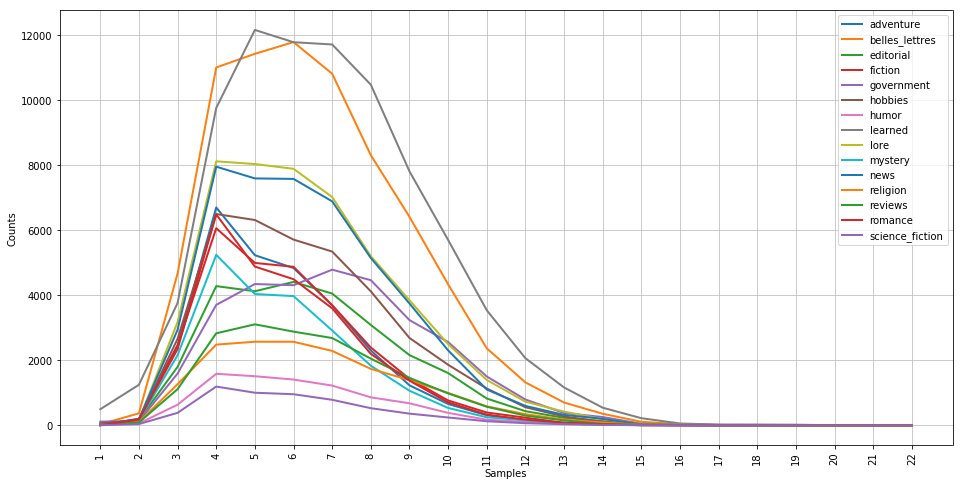

In [19]:
cfd = nltk.ConditionalFreqDist(
           (genre, len(word))
           for genre in brown.categories()
           for word in get_brown_corpus_words(genre))

plt.figure(figsize=(16,8))
cfd.plot()

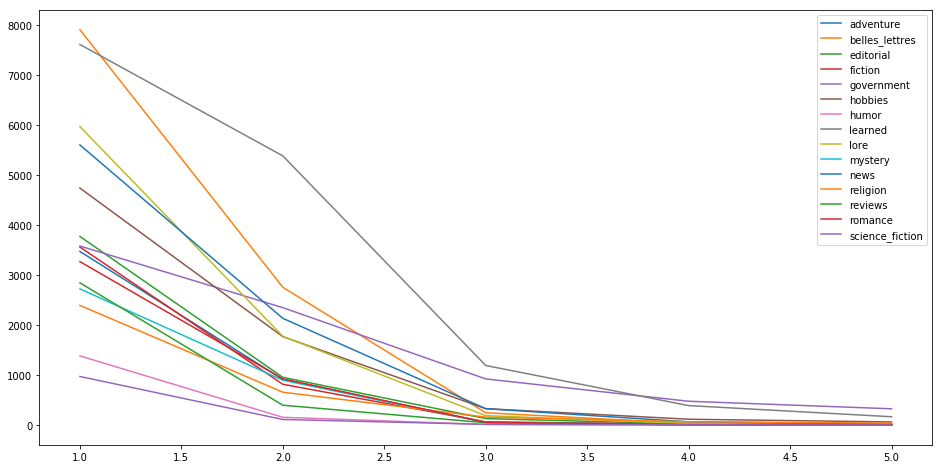

In [20]:
from nltk.util import ngrams
plt.figure(figsize=(16,8))
for genre in brown.categories():
    sol = []
    for i in range(1,6):
        count = 0
        fdist = nltk.FreqDist(ngrams(get_brown_corpus_words(genre), i))
        sol.append(len([cnt for ng,cnt in fdist.most_common() if cnt > 1]))
    plt.plot(np.arange(1,6), sol, label=genre)
plt.legend()
plt.show()